In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
sns.set()
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('car data.csv')
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data['years_used']=2022-data['Year']
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_used
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [4]:
data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_used
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189,8.372093
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915,2.891554
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000,4.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000,6.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000,8.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000,10.000000


In [5]:
data_pre=data.copy()
data_pre=data_pre.drop(columns=['Car_Name','Year'],axis=1)
data_pre = pd.get_dummies(data_pre,drop_first=True)
data_pre.isnull().sum()
data_pre.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'years_used',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [6]:
variables = data_pre[[ 'Present_Price', 'Kms_Driven', 'Owner', 'years_used',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']]
vif_data = pd.DataFrame()
vif_data["VIF"] =  [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_data["feature"] = variables.columns
vif_data

,VIF,feature
0,3.207249,Present_Price
1,2.891695,Kms_Driven
2,1.087333,Owner
3,13.391404,years_used
4,5.118179,Fuel_Type_Diesel
5,15.542434,Fuel_Type_Petrol
6,2.231259,Seller_Type_Individual
7,8.416291,Transmission_Manual


<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

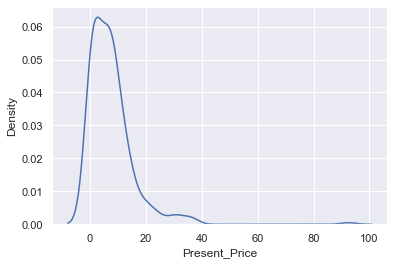

In [7]:
sns.kdeplot(data_pre['Present_Price'])

In [8]:
q = data_pre['Present_Price'].quantile(0.99)
data_2 = data_pre[data_pre['Present_Price']<q]

<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

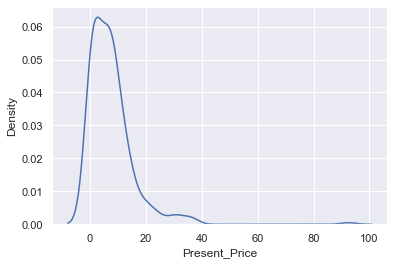

In [9]:
sns.kdeplot(data_pre['Present_Price'])

<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

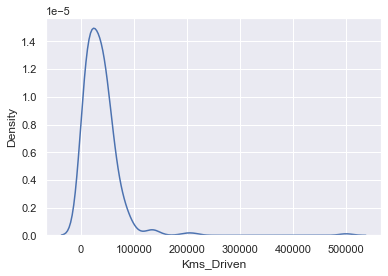

In [10]:
sns.kdeplot(data_pre['Kms_Driven'])

In [11]:
q = data_2['Kms_Driven'].quantile(0.99)
data_3 = data_2[data_pre['Kms_Driven']<q]

C:\Users\Harshith\AppData\Local\Temp\ipykernel_19220\1514413652.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_3 = data_2[data_pre['Kms_Driven']<q]


<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

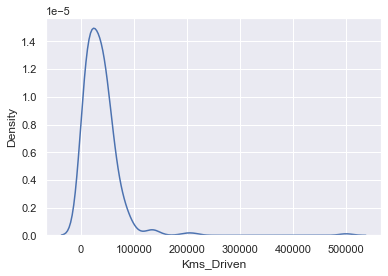

In [12]:
sns.kdeplot(data_pre['Kms_Driven'])

In [13]:
data_cleaned = data_3.reset_index(drop=True)

In [14]:
data_cleaned.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,4.330512,6.977577,33996.358362,0.044369,8.317406,0.184300,0.808874,0.354949,0.880546
std,4.206192,6.334845,24521.028403,0.251184,2.843812,0.388392,0.393861,0.479316,0.324877
min,0.100000,0.320000,500.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000
50%,3.510000,6.050000,31427.000000,0.000000,8.000000,0.000000,1.000000,0.000000,1.000000
75%,5.950000,9.400000,46706.000000,0.000000,10.000000,0.000000,1.000000,1.000000,1.000000
max,23.000000,30.610000,142000.000000,3.000000,19.000000,1.000000,1.000000,1.000000,1.000000


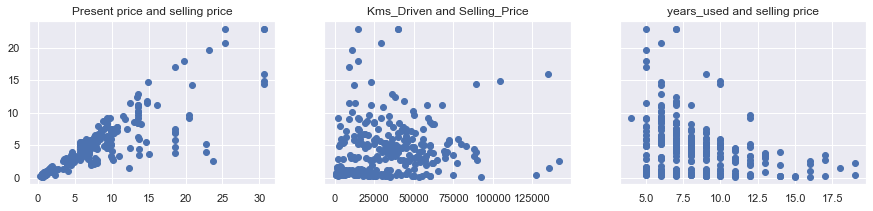

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Present_Price'],data_cleaned['Selling_Price'])
ax1.set_title('Present price and selling price')
ax2.scatter(data_cleaned['Kms_Driven'],data_cleaned['Selling_Price'])
ax2.set_title('Kms_Driven and Selling_Price')
ax3.scatter(data_cleaned['years_used'],data_cleaned['Selling_Price'])
ax3.set_title('years_used and selling price')


plt.show()

In [16]:
x1=data_cleaned[['Present_Price', 'Kms_Driven','Owner', 'years_used',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']]
y=data_cleaned[['Selling_Price']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, random_state=0, train_size = .75)

In [18]:
x = sm.add_constant(X_train)
model=sm.OLS( y_train,x)
results = sm.OLS( y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     237.9
Date:                Sun, 22 May 2022   Prob (F-statistic):          7.69e-101
Time:                        11:33:31   Log-Likelihood:                -386.57
No. Observations:                 219   AIC:                             791.1
Df Residuals:                     210   BIC:                             821.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9747      1.158      3.432      0.001       1.691       6.258
Present_Price              0.5815      0.025     23.509      0.000       0.533       0.630
Kms_Driven             -4.003e-05    6.2e-06     -6.456      0.000   -5.23e-05   -2.78e-05
Owner                     -0.6795      0.357     -1.905      0.058      -1.383       0.023
years_used                -0.2413      0.047     -5.085      0.000      -0.335      -0.148
Fuel_Type_Diesel           1.8338      1.054      1.739      0.083      -0.245       3.912
Fuel_Type_Petrol           0.3754      1.034      0.363      0.717      -1.662       2.413
Seller_Type_Individual    -0.6762      0.269     -2.509      0.013      -1.207      -0.145
Transmission_Manual       -0.7215      0.368     -1.959      0.051      -1.447       0.004
==============================================================================
Omnibus:                       26.277   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.449
Skew:                          -0.277   Prob(JB):                     6.30e-25
Kurtosis:                       6.451   Cond. No.                     7.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X_test1=sm.add_constant(X_test)

output=results.predict(X_test1)
actual=y_test['Selling_Price']


,const,Present_Price,Kms_Driven,Owner,years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
226,1.0,5.700,4492,0,7,0,1,0,1
285,1.0,9.900,38000,0,12,0,1,0,1
209,1.0,4.430,15000,0,6,0,1,0,1
171,1.0,0.570,24000,0,6,0,1,1,0
118,1.0,1.750,11500,0,10,0,1,1,1
...,...,...,...,...,...,...,...,...,...
187,1.0,0.787,50000,0,14,0,1,1,1
160,1.0,0.550,1000,0,6,0,1,1,1
214,1.0,7.600,77632,0,8,1,0,0,1
167,1.0,0.510,1300,0,5,0,1,1,0


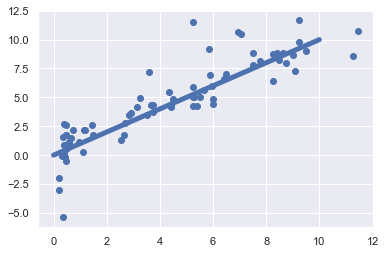

In [20]:
plt.scatter(actual,output)
plt.plot([0,10],[0,10],linewidth = '5')
plt.show()

C:\Users\Harshith\anaconda3\envs\car_price\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

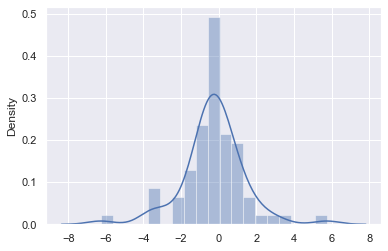

In [22]:
sns.distplot(actual-output)

In [24]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(results, file)